In [9]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("Data_Exercise1.csv")
df.head()

,Square,Price
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418


In [18]:
x_train = df['Square'].to_numpy().reshape(-1, 1)
y_train = df['Price'].to_numpy().reshape(-1, 1)

In [39]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
y_train = ss.fit_transform(y_train)

In [13]:
class LinearModel(torch.nn.Module):
    def __init__(self, inputsize, outputsize) -> None:
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(inputsize, outputsize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [40]:
inputDim = 1         
outputDim = 1       
learningRate = 0.01 
epochs = 100

model = LinearModel(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [55]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = torch.from_numpy(x_train).to(torch.float32).cuda()
        labels = torch.from_numpy(y_train).to(torch.float32).cuda()
    else:
        inputs = torch.from_numpy(x_train).to(torch.float32)
        labels = torch.from_numpy(y_train).to(torch.float32)

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.00979458075016737
epoch 1, loss 0.009503175504505634
epoch 2, loss 0.009223311208188534
epoch 3, loss 0.008954531513154507
epoch 4, loss 0.008696393109858036
epoch 5, loss 0.008448483422398567
epoch 6, loss 0.008210387080907822
epoch 7, loss 0.007981723174452782
epoch 8, loss 0.007762107066810131
epoch 9, loss 0.007551195565611124


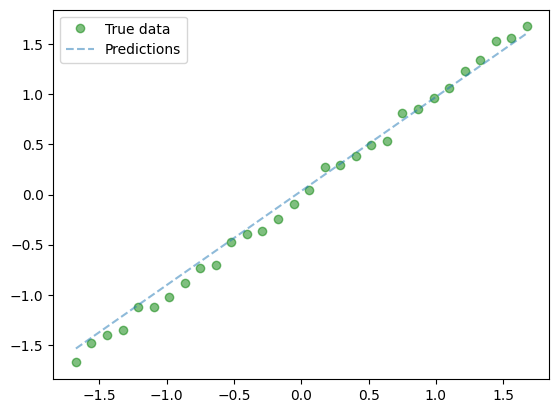

In [58]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(torch.from_numpy(x_train).to(torch.float32).cuda()).cpu().data.numpy()
    else:
        predicted = model(torch.from_numpy(x_train).to(torch.float32)).data.numpy()

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()